# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
cd D:\AppliedAI\Applied_ML_Course_Assignments\5_Performance_metrics\

D:\AppliedAI\Applied_ML_Course_Assignments\5_Performance_metrics


In [20]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [21]:
# write your code here

###############################
##### Loading Data ############
###############################

data = pd.read_csv("./5_a.csv")  # cd uses \\ for nativagting but pandas uses / for subfolder. Practise 
print(data.head(10))
print(data["y"].value_counts())


#############################################################################
####### converting praba values to 0 to 1 based on thresold of 0.5 ##########
#############################################################################

data["y_pred"] = [1 if i >0.5 else 0 for i in data["proba"] ]
print(data["y_pred"].value_counts())
print(data.head())

     y     proba
0  1.0  0.637387
1  1.0  0.635165
2  1.0  0.766586
3  1.0  0.724564
4  1.0  0.889199
5  1.0  0.601600
6  1.0  0.666323
7  1.0  0.567012
8  1.0  0.650230
9  1.0  0.829346
1.0    10000
0.0      100
Name: y, dtype: int64
1    10100
Name: y_pred, dtype: int64
     y     proba  y_pred
0  1.0  0.637387       1
1  1.0  0.635165       1
2  1.0  0.766586       1
3  1.0  0.724564       1
4  1.0  0.889199       1


In [22]:

#############################################################################
######################### Creating confusion matrix #########################
#############################################################################

tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(data)):
    if data["y_pred"][i] == 1:
        if data["y"][i] == data["y_pred"][i]:
            tp += 1
        else:
            fp += 1
    else:
        if data["y"][i] == data["y_pred"][i]:
            tn += 1
        else:
            fn += 1        
        
print(tp,fp,fn,tn)
confusion_matrix = pd.DataFrame({"1":[tp,fp],"0":[fn,tn]}, index = [1,0])
print(confusion_matrix)

10000 100 0 0
       1  0
1  10000  0
0    100  0


In [23]:
################################### metrics ########################################

tpr = tp/(tp+fn)          # of all actual true values how  many are predicted true
fnr = fn/(tp+fn)          # of all actual true values how many are predicted negative
tnr = tn/(tn+fp)          # of all actual negative values howm any are predicted negative
fpr = fp/(fp+tn)          # of all actual negative values howm any are predicted positive

precision = tp/(tp+fp)    # of all postively predicted how many are actually true
recall = tp/(tp+fn)       # of all actual true values how  many are predicted true

f1_score = 2*precision*recall/(precision+recall)
accuracy_score = (tp+tn)/(tp+tn+fp+fn)   # of all the predicted values how many are correctly predicted

print(tpr,fnr,tnr,fpr, precision, recall,f1_score, accuracy_score)

1.0 0.0 0.0 1.0 0.9900990099009901 1.0 0.9950248756218906 0.9900990099009901


In [24]:
################################# Sorting probabilities ####################################

# finding unique probabilities
len(set(data["proba"])) == len(data) # guessing all probabilities will be different

#  sorting data 
sorted_proba = data["proba"].sort_values(ascending=True)
X = sorted_proba.reset_index(drop =True)
X.head()

0    0.500019
1    0.500047
2    0.500058
3    0.500058
4    0.500081
Name: proba, dtype: float64

In [25]:
################################### tpr fpr for different thresholds ################
tpr = []
fpr = []

for i in range(10):                  # 10 should be replaced with len(data). Taking hours to run so using only a few thresholds
    j = i+1
    print(X[j-1])
    data["y_pred"] = [1 if i >X[j-1] else 0 for i in data["proba"] ]
    # print(data["y_pred"].value_counts())
    # print(data.head())
    ################ another for loop ############################
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(data)):
               
        if data["y_pred"][i] == 1:
            if data["y"][i] == data["y_pred"][i]:
                tp += 1
            else:
                fp += 1
        else:
            if data["y"][i] == data["y_pred"][i]:
                tn += 1
            else:
                fn += 1
            
    
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))

print(tpr)
print(fpr)

0.5000185949718864
0.5000473407183691
0.5000580078593906
0.5000581510668138
0.5000812600762915
0.5001975312600645
0.5001997894475683
0.5002436770798491
0.5003012990201631
0.5003078086272976
[0.9999, 0.9998, 0.9997, 0.9996, 0.9995, 0.9994, 0.9993, 0.9992, 0.9991, 0.999]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


0.0


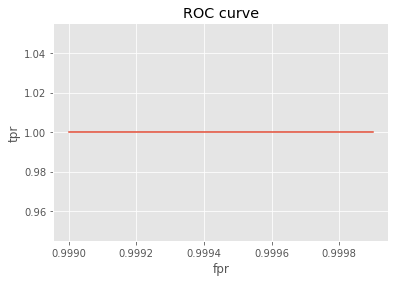

In [26]:
print(np.trapz(tpr, fpr))
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(tpr,fpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [27]:
# write your code here

###############################
##### Loading Data ############
###############################

data2 = pd.read_csv("./5_b.csv")  # cd uses \\ for nativagting but pandas uses / for subfolder. Practise 
print(data2.head(10))
print(data2["y"].value_counts())


#############################################################################
####### converting praba values to 0 to 1 based on thresold of 0.5 ##########
#############################################################################

data2["y_pred"] = [1 if i >0.5 else 0 for i in data2["proba"] ]
print(data2["y_pred"].value_counts())
print(data2.head())

     y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648
5  0.0  0.190260
6  0.0  0.320328
7  0.0  0.435013
8  0.0  0.284849
9  0.0  0.427919
0.0    10000
1.0      100
Name: y, dtype: int64
0    9806
1     294
Name: y_pred, dtype: int64
     y     proba  y_pred
0  0.0  0.281035       0
1  0.0  0.465152       0
2  0.0  0.352793       0
3  0.0  0.157818       0
4  0.0  0.276648       0


In [28]:

#############################################################################
######################### Creating confusion matrix #########################
#############################################################################

tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(data2)):
    if data2["y_pred"][i] == 1:
        if data2["y"][i] == data2["y_pred"][i]:
            tp += 1
        else:
            fp += 1
    else:
        if data2["y"][i] == data2["y_pred"][i]:
            tn += 1
        else:
            fn += 1        
        
print(tp,fp,fn,tn)
confusion_matrix = pd.DataFrame({"1":[tp,fp],"0":[fn,tn]}, index = [1,0])
print(confusion_matrix)

55 239 45 9761
     1     0
1   55    45
0  239  9761


In [29]:
################################### metrics ########################################

tpr = tp/(tp+fn)          # of all actual true values how  many are predicted true
fnr = fn/(tp+fn)          # of all actual true values how many are predicted negative
tnr = tn/(tn+fp)          # of all actual negative values howm any are predicted negative
fpr = fp/(fp+tn)          # of all actual negative values howm any are predicted positive

precision = tp/(tp+fp)    # of all postively predicted how many are actually true
recall = tp/(tp+fn)       # of all actual true values how  many are predicted true

f1_score = 2*precision*recall/(precision+recall)
accuracy_score = (tp+tn)/(tp+tn+fp+fn)   # of all the predicted values how many are correctly predicted

print(tpr,fnr,tnr,fpr, precision, recall,f1_score, accuracy_score)

0.55 0.45 0.9761 0.0239 0.1870748299319728 0.55 0.2791878172588833 0.9718811881188119


In [30]:
################################# Sorting probabilities  ####################################

# finding unique probabilities
len(set(data2["proba"])) == len(data2) # guessing all probabilities will be different

#  sorting data 
sorted_proba = data2["proba"].sort_values(ascending=True)
X = sorted_proba.reset_index(drop =True)
X.head()

0    0.100001
1    0.100161
2    0.100165
3    0.100189
4    0.100230
Name: proba, dtype: float64

In [31]:
################################### tpr fpr for different thresholds ################
tpr = []
fpr = []

for i in range(10):            # 10 should be replaced with len(data). Taking hours to run so using only a few thresholds
    j = i+1
    print(X[j-1])
    data2["y_pred"] = [1 if i >X[j-1] else 0 for i in data2["proba"] ]
    # print(data["y_pred"].value_counts())
    # print(data.head())
    ################ another for loop ############################
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(data2)):
               
        if data["y_pred"][i] == 1:
            if data2["y"][i] == data2["y_pred"][i]:
                tp += 1
            else:
                fp += 1
        else:
            if data2["y"][i] == data2["y_pred"][i]:
                tn += 1
            else:
                fn += 1
            
    
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))

print(tpr)
print(fpr)

0.10000141285578913
0.10016080437256432
0.10016507626754403
0.10018885836254708
0.10022970009062958
0.1002421268327976
0.10024743027210822
0.10030373243093957
0.1003371449874035
0.10039740418217284
[0.9099099099099099, 0.9107142857142857, 0.911504424778761, 0.9122807017543859, 0.9130434782608695, 0.9137931034482759, 0.9145299145299145, 0.9152542372881356, 0.9159663865546218, 0.9166666666666666]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


0.0


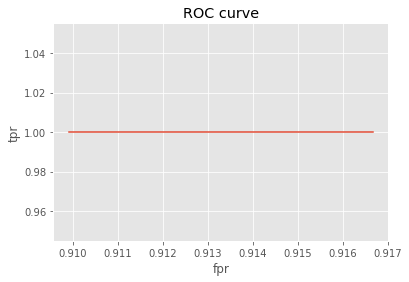

In [32]:
print(np.trapz(tpr, fpr))
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(tpr,fpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [33]:
# write your code here
del data
###############################
##### Loading Data ############
###############################

data = pd.read_csv("./5_c.csv")  # cd uses \\ for nativagting but pandas uses / for subfolder. Practise 
print(data.head(10))
print(data["y"].value_counts())


#############################################################################
####### converting praba values to 0 to 1 based on thresold of 0.5 ##########
#############################################################################

data["y_pred"] = [1 if i >0.5 else 0 for i in data["prob"] ]
print(data["y_pred"].value_counts())
print(data.head())

   y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579
5  0  0.595387
6  0  0.370288
7  0  0.299273
8  0  0.297000
9  0  0.266479
0    1805
1    1047
Name: y, dtype: int64
0    2099
1     753
Name: y_pred, dtype: int64
   y      prob  y_pred
0  0  0.458521       0
1  0  0.505037       1
2  0  0.418652       0
3  0  0.412057       0
4  0  0.375579       0


In [34]:
#############################################################################
######################### Creating confusion matrix #########################
#############################################################################

tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(data)):
    if data["y_pred"][i] == 1:
        if data["y"][i] == data["y_pred"][i]:
            tp += 1
        else:
            fp += 1
    else:
        if data["y"][i] == data["y_pred"][i]:
            tn += 1
        else:
            fn += 1        
        
print(tp,fp,fn,tn)
confusion_matrix = pd.DataFrame({"1":[tp,fp],"0":[fn,tn]}, index = [1,0])
print(confusion_matrix)

585 168 462 1637
     1     0
1  585   462
0  168  1637


In [35]:
################################### metrics ########################################

tpr = tp/(tp+fn)          # of all actual true values how  many are predicted true
fnr = fn/(tp+fn)          # of all actual true values how many are predicted negative
tnr = tn/(tn+fp)          # of all actual negative values howm any are predicted negative
fpr = fp/(fp+tn)          # of all actual negative values howm any are predicted positive

precision = tp/(tp+fp)    # of all postively predicted how many are actually true
recall = tp/(tp+fn)       # of all actual true values how  many are predicted true

f1_score = 2*precision*recall/(precision+recall)
accuracy_score = (tp+tn)/(tp+tn+fp+fn)   # of all the predicted values how many are correctly predicted

print(tpr,fnr,tnr,fpr, precision, recall,f1_score, accuracy_score)

0.5587392550143266 0.44126074498567336 0.9069252077562326 0.09307479224376732 0.7768924302788844 0.5587392550143266 0.65 0.7791023842917251


In [36]:
################################# Sorting probabilities  ####################################

# finding unique probabilities
len(set(data["prob"])) == len(data) # guessing all probabilities will be different

#  sorting data 
sorted_proba = data["prob"].sort_values(ascending=True)
X = sorted_proba.reset_index(drop =True)
X.head()

0    0.028038
1    0.028396
2    0.028964
3    0.030269
4    0.031114
Name: prob, dtype: float64

In [37]:
################################### A different thresholds ################
tpr = []
fpr = []
A = []
for i in range(len(data)):
    j = i+1
    print(X[j-1])
    data["y_pred"] = [1 if i >X[j-1] else 0 for i in data["prob"] ]
    # print(data["y_pred"].value_counts())
    # print(data.head())
    ################ another for loop ############################
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(data)):
               
        if data["y_pred"][i] == 1:
            if data["y"][i] == data["y_pred"][i]:
                tp += 1
            else:
                fp += 1
        else:
            if data["y"][i] == data["y_pred"][i]:
                tn += 1
            else:
                fn += 1
    
    A.append(500*fn + 100*fp)
    
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))

print(tpr)
print(fpr)
print(A)

0.02803798623987141
0.02839574137249512
0.028963660871660364
0.030268601469091494
0.0311139870334316
0.03139788556743317
0.03188140327866018
0.03191340452915914
0.03280642064842021
0.03415431203068908
0.03439654530705627
0.03457194405633046
0.034717339116173807
0.03495223941029724
0.03497270474562775
0.035116785281413265
0.03595502473212575
0.03647150703378621
0.03691677789430359
0.03703610639314392
0.03816142114433085
0.03880058591430247
0.038856311424358525
0.038969325052725316
0.03904342490273549
0.039080987105498455
0.03914926019874776
0.0394396926905658
0.039494978414999486
0.03984311303576904
0.040313717481252336
0.040876145298416544
0.040924023937534686
0.04183853639138714
0.0428343334713498
0.04315025419802277
0.04382452288189453
0.043861522867872926
0.04406174131341878
0.044491326486742144
0.044495611577420664
0.04466984239784444
0.04473151226301453
0.044732654416883344
0.04522225824562276
0.04686853370151002
0.046959301909884836
0.04785382103275604
0.04833235933973978
0.04926

0.15159295136864126
0.1516646388414744
0.15192230005522034
0.15206258361404
0.15212963239566699
0.15213267545442322
0.15214590768556335
0.15255927072988973
0.1527695438346347
0.15298213588224874
0.15348706374297272
0.15364554403601471
0.1540935289215397
0.15469367359135594
0.1547225367378544
0.15474229547623042
0.15477133280522115
0.15491434851208252
0.15513972374233045
0.15529107483657634
0.15546452515834086
0.15566700374757925
0.15572147836556305
0.15585829116202687
0.15615229832159505
0.15619324510161936
0.15639999508857727
0.15683215051083954
0.1568929005313564
0.1569679363353832
0.15715862448151052
0.1575963650200818
0.15759791312990967
0.15793697334624626
0.15814860769220296
0.158171982378573
0.1582184055367032
0.15842601576366944
0.15849900406760142
0.15871800925280602
0.15880171189437042
0.1589170549366925
0.1590721216556188
0.15914263435312215
0.15934457005681213
0.15945276899917704
0.15967164329580366
0.15976984758634827
0.16068346919240173
0.1611708620110074
0.16123238850284

0.2243206633909328
0.2245263763376184
0.2245803249848856
0.22481446330611765
0.22508100077912616
0.2252401951197032
0.22554128959372235
0.22586153528174835
0.2261076714541461
0.22629522471814545
0.2267300196596093
0.2269401356980607
0.2269500189939061
0.2269500189939061
0.22705148643738515
0.2270598041044699
0.2274311370140797
0.2274401936982129
0.2274719122293833
0.2276558819654826
0.2276817999176077
0.2290180712132841
0.2290865964180714
0.2295655543739731
0.2296094378909549
0.22981914032149964
0.22987164436159915
0.2300390278970873
0.2301521752331708
0.2303323028860865
0.230739326090426
0.2313558938535484
0.2313693028849524
0.2314070044337092
0.23178435016322785
0.2318896119659012
0.2323496067846144
0.2326626485666713
0.23277569300419576
0.2328848854915516
0.2328900026308524
0.23289227767570606
0.2330460790041331
0.2332162800672893
0.2332809124443982
0.2333601616524361
0.23343850833338664
0.2336263890201981
0.2336718146059964
0.2337744042680069
0.2340345624330881
0.2342289307632962
0

0.307083696932406
0.30736458382091003
0.30736917237172257
0.30738975429857096
0.30763816712675873
0.30791708746471924
0.3082167022937053
0.30845530351271505
0.3087646832337251
0.3090199952995455
0.3094998839739207
0.3096100905457059
0.3096670758079838
0.30977559713898484
0.3098422228484541
0.3098631227338636
0.30987404367408233
0.30991934843965474
0.3101046069248302
0.3102325188952524
0.3104930650946256
0.31061932122385183
0.31071661251622273
0.31078678208428456
0.31080079582091924
0.3109402382695997
0.3113481301713634
0.3115690559954256
0.3116220235824585
0.31164730964480225
0.31165131040521565
0.31274742814334666
0.3128446864115225
0.3129348460886929
0.3129932074933439
0.3130719303279311
0.31322382108585256
0.3133584349542051
0.3133600825393522
0.3135130276551118
0.3135492302275993
0.3137440012918936
0.3138462385615787
0.3138462385615787
0.3150482258281192
0.3151122750462713
0.315224355137026
0.3152484144713428
0.3153075650334358
0.3155279697195904
0.3158265078389967
0.31587476424268

0.39680140123173996
0.3968494808351671
0.3970329970926851
0.3970459876833735
0.3972060752881539
0.3973117462686591
0.3984814570159525
0.3986727441283496
0.39872288865012095
0.3993081410188932
0.3993081410188932
0.3994816769216512
0.4003916540862741
0.4008086456640346
0.4011711373522475
0.4015265725351669
0.40175940051070747
0.4022345550962396
0.4024503531085478
0.4026434163789492
0.4026610416335028
0.4029858748655062
0.40326222132992096
0.4032763210502831
0.4035494923591614
0.4044784818952149
0.4049686195479857
0.4057334764180957
0.4061395167498976
0.4061770837854695
0.4068435114380475
0.406889865930016
0.4070331031406248
0.4070600096035648
0.407255568617099
0.4072744250297545
0.4073582549352903
0.40758445134034027
0.40795824414974935
0.4081223256684639
0.40855727324614655
0.4091941923708529
0.4093537151410773
0.409814440116689
0.41009402496589203
0.4104209820160993
0.41048372234847097
0.4107507277984877
0.4107921365145091
0.4107980309305964
0.4109131464281598
0.41102566288129705
0.411

0.5059918990811786
0.5060274278795397
0.5061798206454999
0.5062279973078418
0.5063874241266701
0.5065465706425745
0.5067422724253423
0.5069244812066491
0.5069244812066491
0.5069346941403441
0.5072265621778127
0.5076398434671197
0.5077214261164537
0.5077660188481614
0.5078766999413838
0.5079647600650787
0.5082471104892525
0.508998393206983
0.5090092348085867
0.5093797419119526
0.5094861130456667
0.5095240149546314
0.5100746535368867
0.5104908280678697
0.510664491234599
0.5109263779343786
0.5114525975407781
0.5115802312219465
0.512070926862794
0.5122052173356753
0.5127443695390547
0.5127568450328466
0.5129044493912039
0.5129256986484334
0.5130265067155297
0.5131198480926655
0.5132539074968647
0.5133941127239047
0.5139443093055003
0.5145184325205313
0.5151654916840631
0.5157823977438178
0.5162433677831212
0.516616277598046
0.516616277598046
0.5170969832185153
0.5174432582146413
0.5175740086549037
0.5175886353528177
0.5179181058664579
0.5186228598090443
0.5186677811717665
0.519193026060993

0.6633117282511415
0.6635589670087839
0.6636375742586884
0.66365620211975
0.6639470329155793
0.6640844835421523
0.6646398650230588
0.6653924173599965
0.665441412780736
0.6675740403903497
0.6675740403903497
0.6678695555877041
0.6681477097240653
0.6690910325662509
0.6701324911335029
0.6705346461888906
0.6708333331185419
0.6708611211663968
0.6715340271994874
0.671621621460528
0.6716328037751688
0.6719703499127079
0.6719703499127079
0.6720032144237209
0.6720032144237209
0.6720032144237209
0.6734445148927939
0.6740666181855911
0.6742664115453089
0.6744618017125774
0.675128259972946
0.6760130444088498
0.6763974858095517
0.6766960739686683
0.6773379114834037
0.678588965655984
0.678632998788679
0.6788172470153989
0.6799208464453349
0.6801932272878852
0.6812544745972028
0.6819133452467017
0.6822841058711748
0.6822945200712294
0.6827431858794109
0.6846471138902612
0.6847971142143816
0.6865247802154437
0.6868051689218829
0.6868916508313772
0.6883473531217188
0.6887966575654778
0.6890262065304292


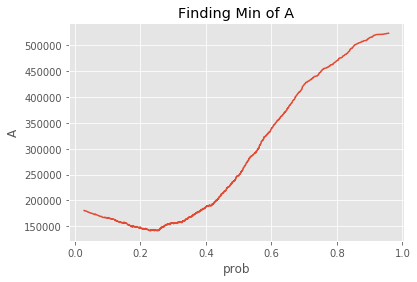

In [38]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(X,A)
plt.xlabel("prob")
plt.ylabel("A")
plt.title("Finding Min of A")
plt.show()

In [39]:
threshold = data['prob'][A.index(min(A))]
print("best thresold probability is {}".format(threshold))

best thresold probability is 0.25002762775968856


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [40]:
###############################
##### Loading Data ############
###############################

df = pd.read_csv("./5_d.csv")  # cd uses \\ for nativagting but pandas uses / for subfolder. Practise 
print(df.head(10))
print(df.shape)

       y   pred
0  101.0  100.0
1  120.0  100.0
2  131.0  113.0
3  164.0  125.0
4  154.0  152.0
5  133.0  153.0
6  148.0  139.0
7  172.0  145.0
8  153.0  162.0
9  162.0  154.0
(157200, 2)


In [41]:
df["residuals"] = df["pred"]-df["y"]
df["sq_residuals"] = (df["pred"]-df["y"])**2
df

,y,pred,residuals,sq_residuals
0,101.0,100.0,-1.0,1.0
1,120.0,100.0,-20.0,400.0
2,131.0,113.0,-18.0,324.0
3,164.0,125.0,-39.0,1521.0
4,154.0,152.0,-2.0,4.0
...,...,...,...,...
157195,87.0,83.0,-4.0,16.0
157196,97.0,86.0,-11.0,121.0
157197,106.0,93.0,-13.0,169.0
157198,105.0,101.0,-4.0,16.0


In [42]:
MSE = df["sq_residuals"].sum()/len(df)
MSE

177.16569974554707

In [43]:
df["SS_tot"] = (df["y"]-(df["y"].mean()))**2

In [44]:
df

,y,pred,residuals,sq_residuals,SS_tot
0,101.0,100.0,-1.0,1.0,1185.969885
1,120.0,100.0,-20.0,400.0,2855.610598
2,131.0,113.0,-18.0,324.0,4152.244694
3,164.0,125.0,-39.0,1521.0,9494.146985
4,154.0,152.0,-2.0,4.0,7645.388715
...,...,...,...,...,...
157195,87.0,83.0,-4.0,16.0,417.708308
157196,97.0,86.0,-11.0,121.0,926.466577
157197,106.0,93.0,-13.0,169.0,1555.349020
157198,105.0,101.0,-4.0,16.0,1477.473193


In [45]:
r2_score = 1-(df["sq_residuals"].sum()/df["SS_tot"].sum())
r2_score

0.9563582786990937

In [46]:
df["abs_error"] = abs(df["residuals"])

In [47]:
df["PAE"] = df["abs_error"]/df["y"]

In [48]:
df

,y,pred,residuals,sq_residuals,SS_tot,abs_error,PAE
0,101.0,100.0,-1.0,1.0,1185.969885,1.0,0.009901
1,120.0,100.0,-20.0,400.0,2855.610598,20.0,0.166667
2,131.0,113.0,-18.0,324.0,4152.244694,18.0,0.137405
3,164.0,125.0,-39.0,1521.0,9494.146985,39.0,0.237805
4,154.0,152.0,-2.0,4.0,7645.388715,2.0,0.012987
...,...,...,...,...,...,...,...
157195,87.0,83.0,-4.0,16.0,417.708308,4.0,0.045977
157196,97.0,86.0,-11.0,121.0,926.466577,11.0,0.113402
157197,106.0,93.0,-13.0,169.0,1555.349020,13.0,0.122642
157198,105.0,101.0,-4.0,16.0,1477.473193,4.0,0.038095


In [49]:
modified_MAPE = df["abs_error"].sum()/df["y"].sum()
modified_MAPE

0.1291202994009687

In [50]:
print("Mean squared error is {}".format(MSE))

print("Modified mean absolute percentage error is {}".format(modified_MAPE))

print("R_squared error is {}".format(r2_score))

Mean squared error is 177.16569974554707
Modified mean absolute percentage error is 0.1291202994009687
R_squared error is 0.9563582786990937
